In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
import random

In [3]:
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels in training set."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels in test set."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28 in training set." 
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28 in test set."

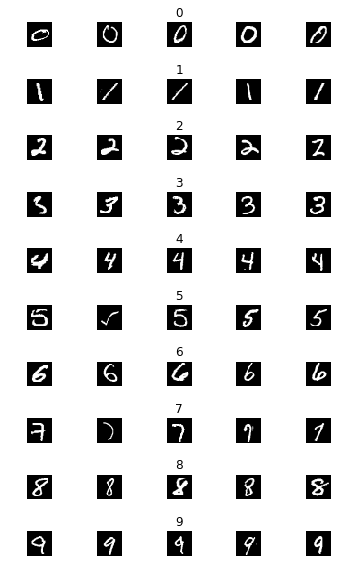

In [6]:
n_cols=5
n_classes=10
num_of_samples=[]
fig, axis = plt.subplots(nrows=n_classes, ncols = n_cols, figsize=(5, 8))
fig.tight_layout()


for i in range(n_cols):
    for j in range(n_classes):
        x_selected = X_train[y_train==j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)),:,:,],cmap=plt.get_cmap("gray"))
        axis[j][i].axis("off")
        if i == 2:
            axis[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

    

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255 
X_test = X_test/255

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


In [8]:
model =Sequential ()
model.add(Dense(units=10,input_shape=(num_pixels,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.6434 - acc: 0.7998 - val_loss: 0.3292 - val_acc: 0.9020
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.3874 - acc: 0.8866 - val_loss: 0.2782 - val_acc: 0.9187
Epoch 3/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.3408 - acc: 0.8991 - val_loss: 0.2818 - val_acc: 0.9160
Epoch 4/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.3238 - acc: 0.9033 - val_loss: 0.2708 - val_acc: 0.9160
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.3109 - acc: 0.9080 - val_loss: 0.2408 - val_acc: 0.9268
Epoch 6/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.3000 - acc: 0.9107 - val_loss: 0.2443 - val_acc: 0.9302
Epoch 7/1

In [9]:
score=model.evaluate(X_test,y_test)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 27us/step
<class 'list'>
Test score: 0.29408206003010273
Test accuracy: 0.9134


(28, 28)


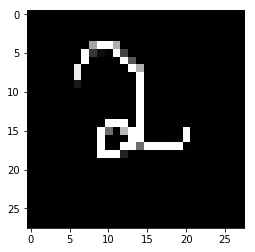

In [10]:
import cv2
imgpath = "C:\\Users\\dhruv\\OneDrive\\Desktop\\2.png"
cv2.imread(imgpath)
img=cv2.imread(imgpath)
img = cv2.resize(img, (28, 28))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)

In [11]:
img = img/255
img = img.reshape(1, 784)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


In [12]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.29408206003010273
Test accuracy: 0.9134
